
--- HEAD ---
  country_name country_id  year  Inflation (CPI %)  GDP (Current USD)  \
0        Aruba         aw  2010           2.078141       2.453597e+09   
1        Aruba         aw  2011           4.316297       2.637859e+09   
2        Aruba         aw  2012           0.627472       2.615208e+09   
3        Aruba         aw  2013          -2.372065       2.727850e+09   
4        Aruba         aw  2014           0.421441       2.790850e+09   

   GDP per Capita (Current USD)  Unemployment Rate (%)  \
0                  24093.140151                    NaN   
1                  25712.384302                    NaN   
2                  25119.665545                    NaN   
3                  25813.576727                    NaN   
4                  26129.839062                    NaN   

   Interest Rate (Real, %)  Inflation (GDP Deflator, %)  \
0                11.666131                    -1.223407   
1                 4.801974                     4.005674   
2                 8.2

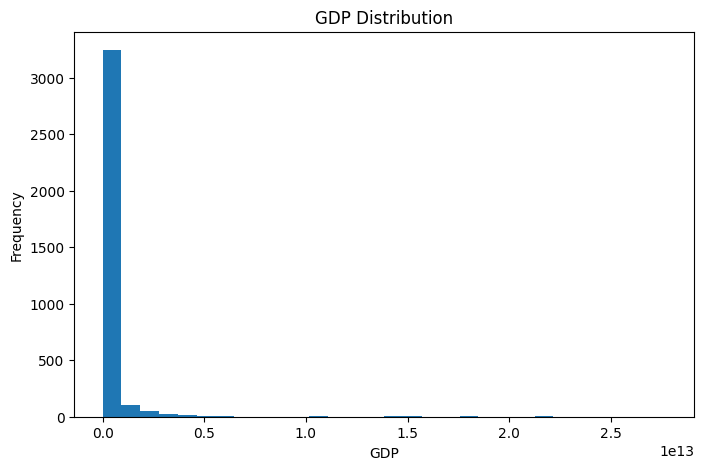

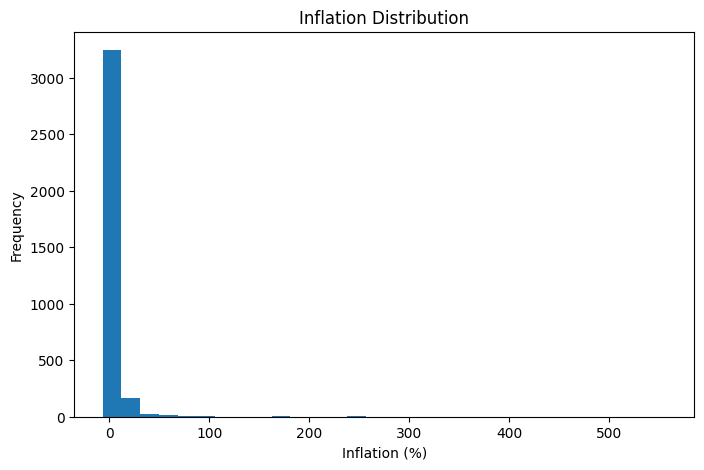

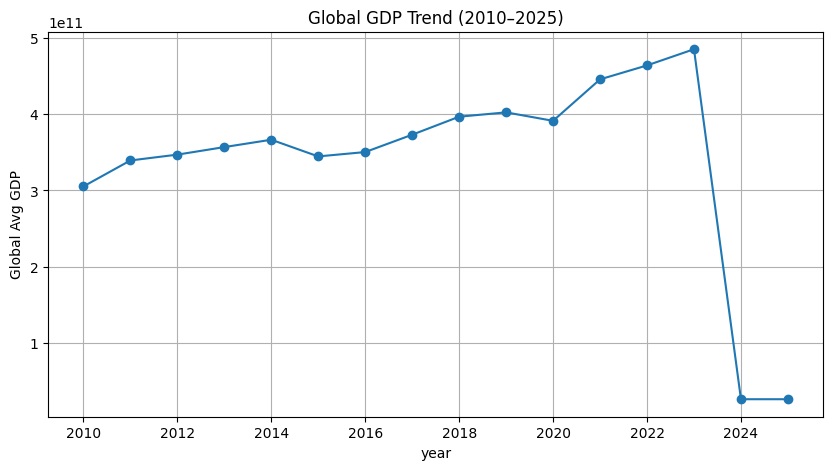

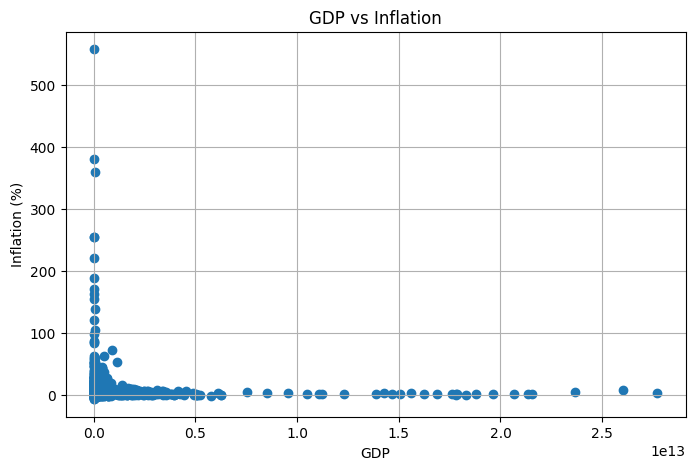

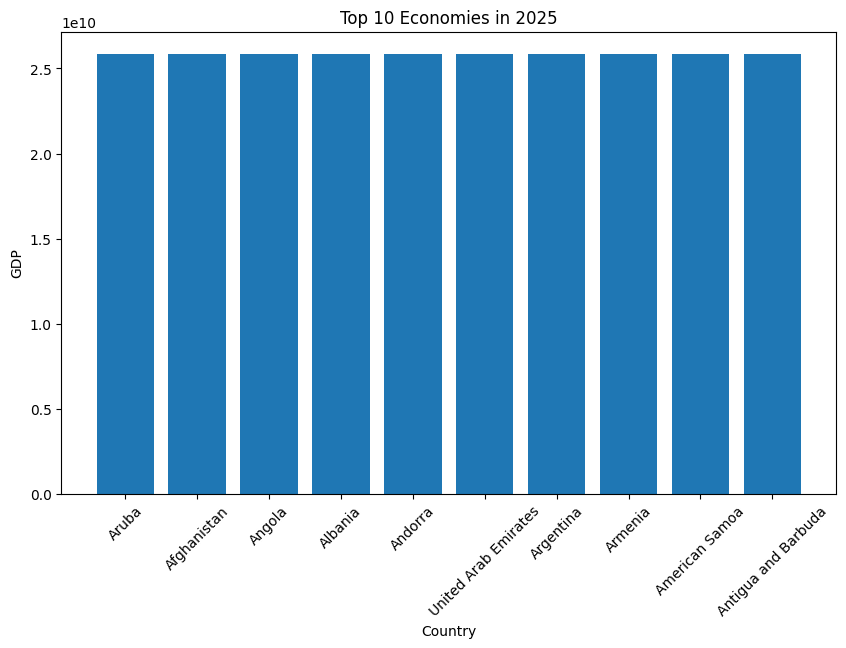


--- CORRELATION MATRIX ---
                                     year  Inflation (CPI %)  \
year                             1.000000           0.032281   
Inflation (CPI %)                0.032281           1.000000   
GDP (Current USD)               -0.020217          -0.025551   
GDP per Capita (Current USD)    -0.062367          -0.085538   
Unemployment Rate (%)           -0.095738           0.034084   
Interest Rate (Real, %)         -0.054322          -0.313198   
Inflation (GDP Deflator, %)      0.033967           0.479307   
GDP Growth (% Annual)           -0.036100          -0.059240   
Current Account Balance (% GDP) -0.000402          -0.033096   
Government Expense (% of GDP)    0.009843          -0.042449   
Government Revenue (% of GDP)   -0.032278          -0.024865   
Tax Revenue (% of GDP)          -0.020511          -0.026865   
Gross National Income (USD)     -0.020011          -0.025679   
Public Debt (% of GDP)           0.017507          -0.037697   

           

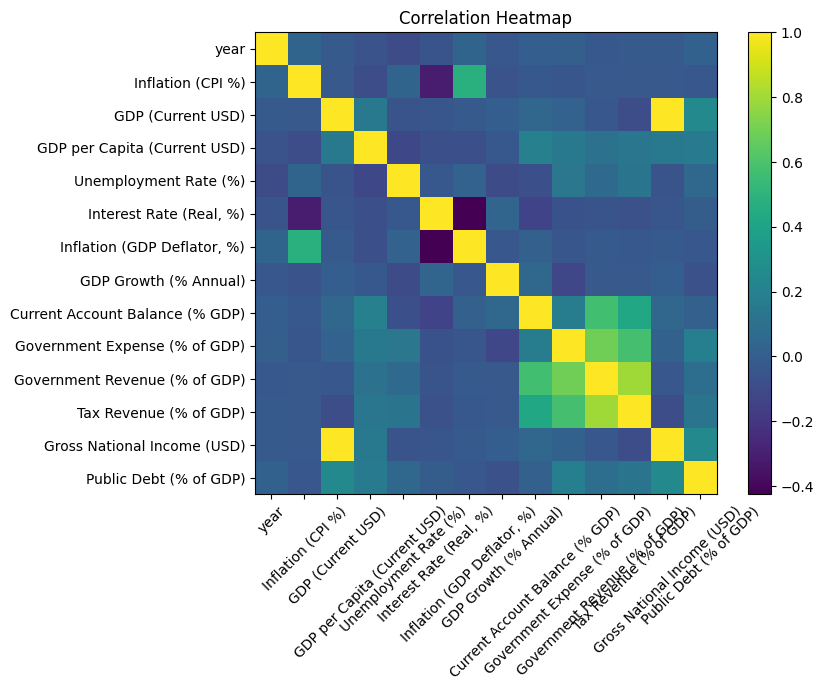

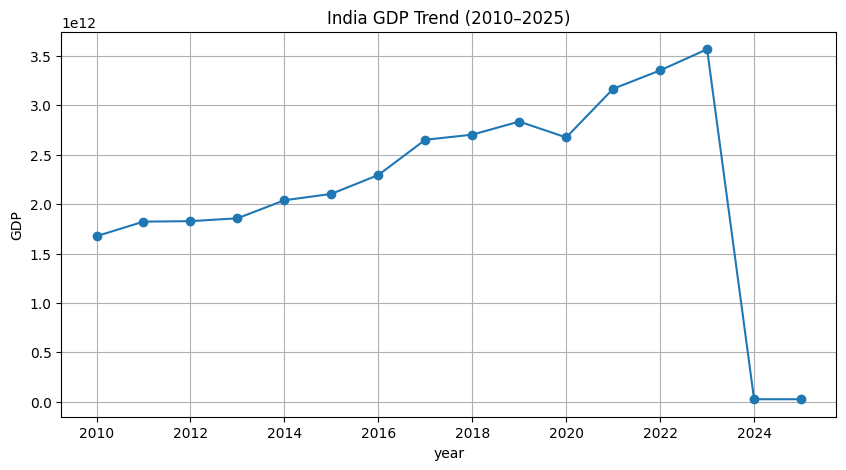

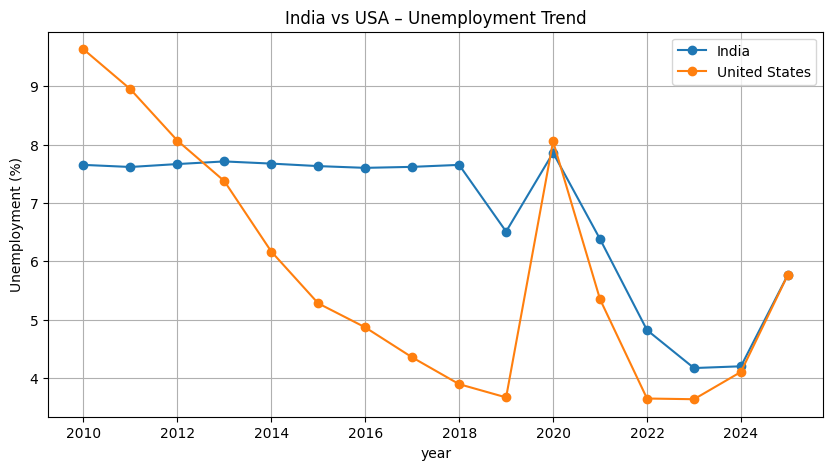


📌 EDA Completed Successfully!


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load Dataset
df = pd.read_csv("/content/world_bank_data_2025.csv")
print("\n--- HEAD ---")
print(df.head())

# 2. Basic Info
print("\n--- INFO ---")
print(df.info())

print("\n--- SHAPE ---")
print(df.shape)

print("\n--- COLUMNS ---")
print(df.columns)

# 3. Descriptive Statistics
print("\n--- DESCRIBE ---")
print(df.describe())

# 4. Missing Values
print("\n--- MISSING VALUES ---")
print(df.isnull().sum())

# Fill missing numeric values with median
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# 5. Drop duplicates
df = df.drop_duplicates()

# 6. Data Type Conversions
df['year'] = df['year'].astype(int)
df['country_name'] = df['country_name'].astype("category")



# Histogram – GDP
plt.figure(figsize=(8,5))
plt.hist(df['GDP (Current USD)'], bins=30)
plt.xlabel("GDP")
plt.ylabel("Frequency")
plt.title("GDP Distribution")
plt.show()

# Histogram – Inflation
plt.figure(figsize=(8,5))
plt.hist(df['Inflation (CPI %)'], bins=30)
plt.xlabel("Inflation (%)")
plt.ylabel("Frequency")
plt.title("Inflation Distribution")
plt.show()



# Global GDP trend (2010–2025)
global_gdp = df.groupby("year")["GDP (Current USD)"].mean()

plt.figure(figsize=(10,5))
plt.plot(global_gdp.index, global_gdp.values, marker='o')
plt.xlabel("year")
plt.ylabel("Global Avg GDP")
plt.title("Global GDP Trend (2010–2025)")
plt.grid(True)
plt.show()

# Scatter – GDP vs Inflation
plt.figure(figsize=(8,5))
plt.scatter(df["GDP (Current USD)"], df["Inflation (CPI %)"])
plt.xlabel("GDP")
plt.ylabel("Inflation (%)")
plt.title("GDP vs Inflation")
plt.grid(True)
plt.show()

# Bar Graph – Top 10 Economies (2025)
top_10 = df[df['year'] == 2025].sort_values("GDP (Current USD)", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top_10["country_name"], top_10["GDP (Current USD)"])
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("GDP")
plt.title("Top 10 Economies in 2025")
plt.show()



corr = df.corr(numeric_only=True)
print("\n--- CORRELATION MATRIX ---")
print(corr)

plt.figure(figsize=(8,6))
plt.imshow(corr, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()



# Example: India's GDP Trend
india = df[df['country_name'] == "India"]

plt.figure(figsize=(10,5))
plt.plot(india['year'], india['GDP (Current USD)'], marker='o')
plt.xlabel("year")
plt.ylabel("GDP")
plt.title("India GDP Trend (2010–2025)")
plt.grid(True)
plt.show()



countries = df[df['country_name'].isin(['India', 'United States'])]

plt.figure(figsize=(10,5))
for c in countries['country_name'].unique():
    subset = countries[countries['country_name'] == c]
    plt.plot(subset['year'], subset['Unemployment Rate (%)'], marker='o', label=c)

plt.xlabel("year")
plt.ylabel("Unemployment (%)")
plt.title("India vs USA – Unemployment Trend")
plt.legend()
plt.grid(True)
plt.show()



if 'Region' in df.columns:
    region_2025 = df[df['year'] == 2025].groupby('Region')['GDP (Current USD)'].sum()

    plt.figure(figsize=(8,8))
    plt.pie(region_2025.values, labels=region_2025.index, autopct='%1.1f%%')
    plt.title("Region-wise Global GDP Share (2025)")
    plt.show()

# -------------------------------
print("\n📌 EDA Completed Successfully!")

/tmp/ipython-input-4005777991.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-4005777991.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

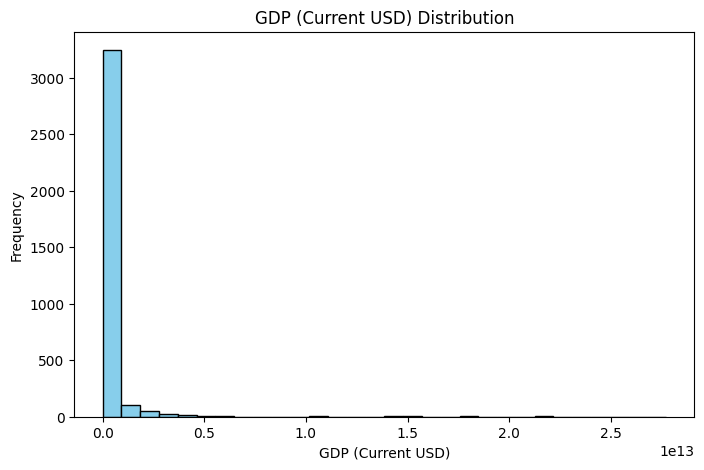

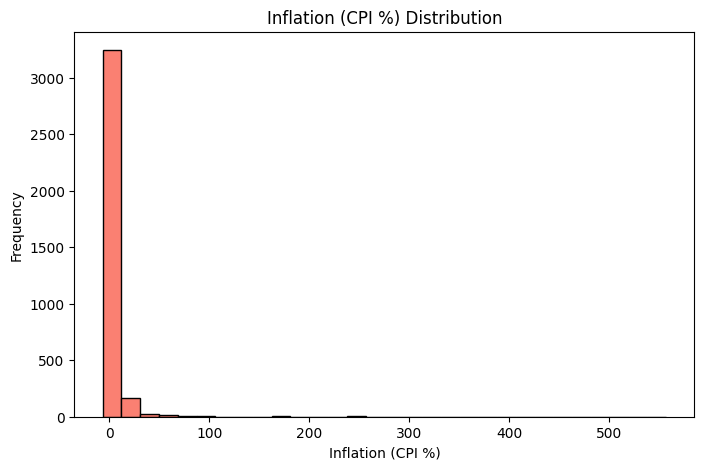

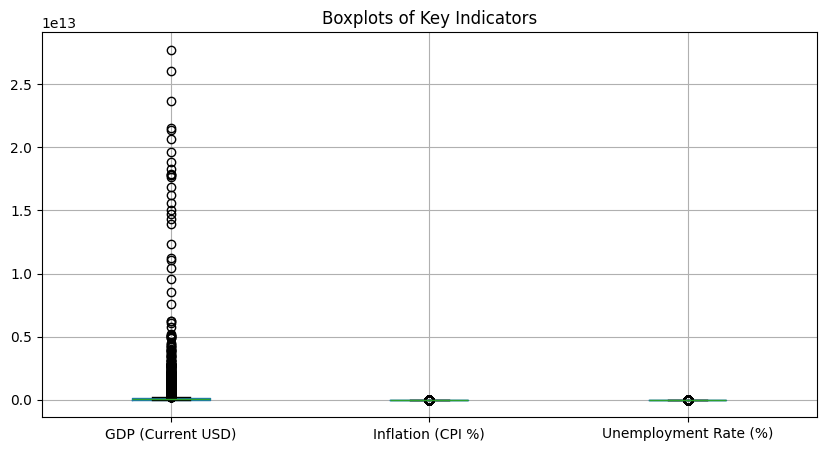

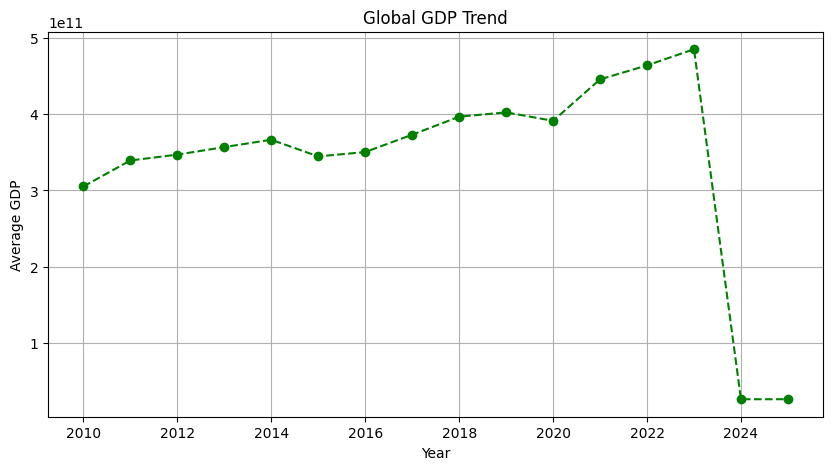

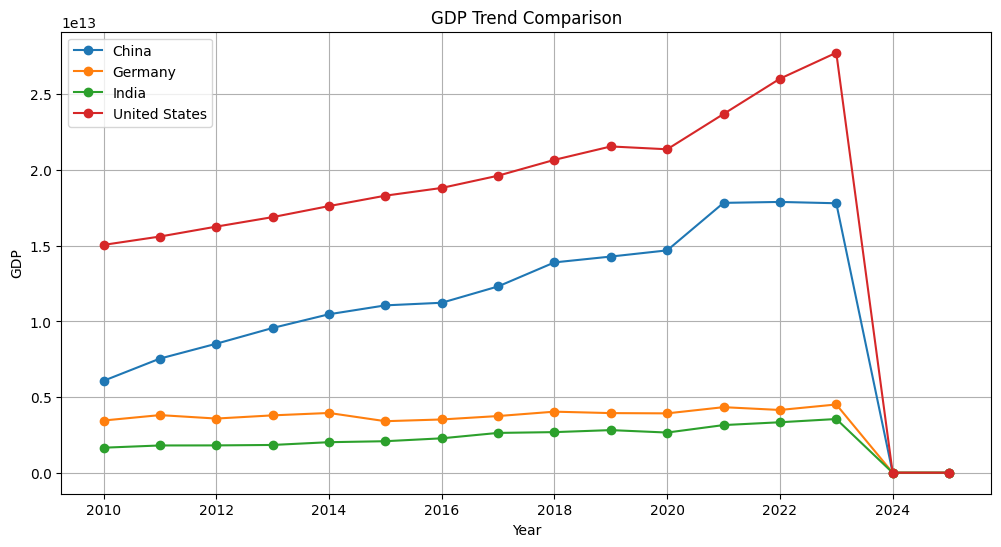

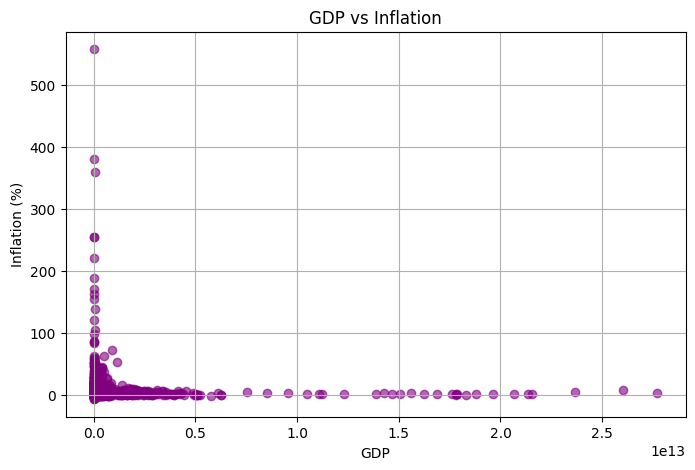

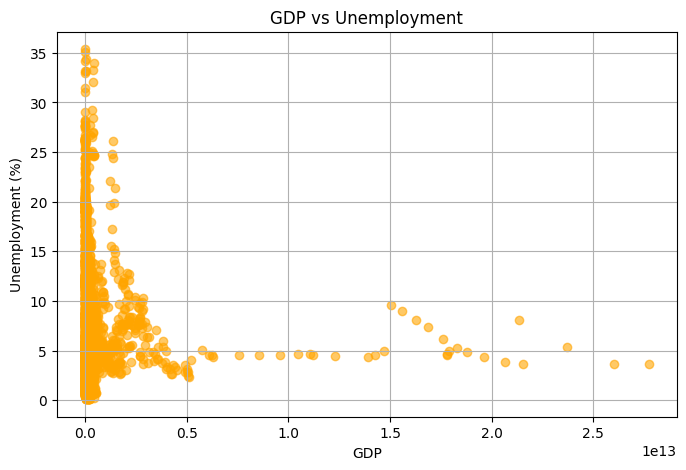

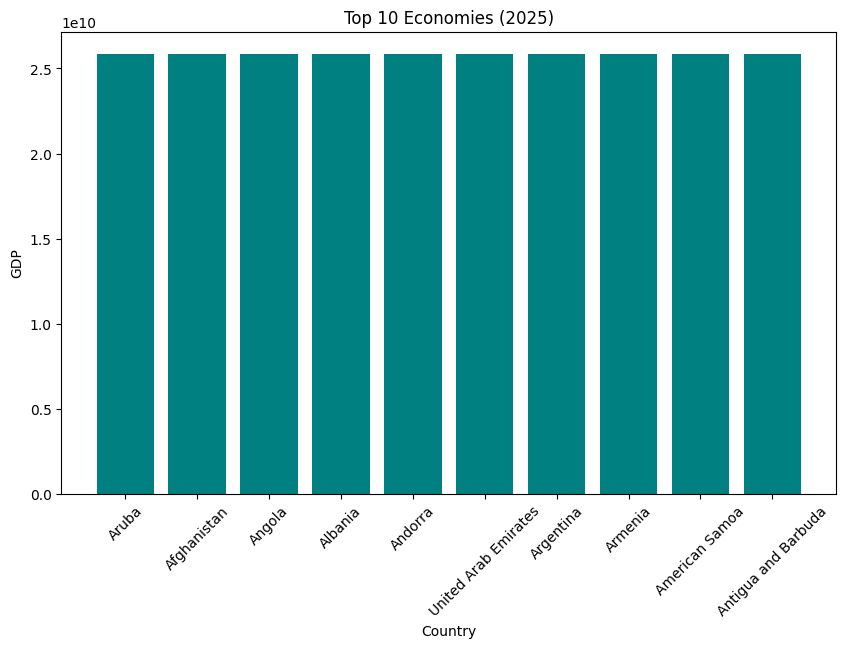

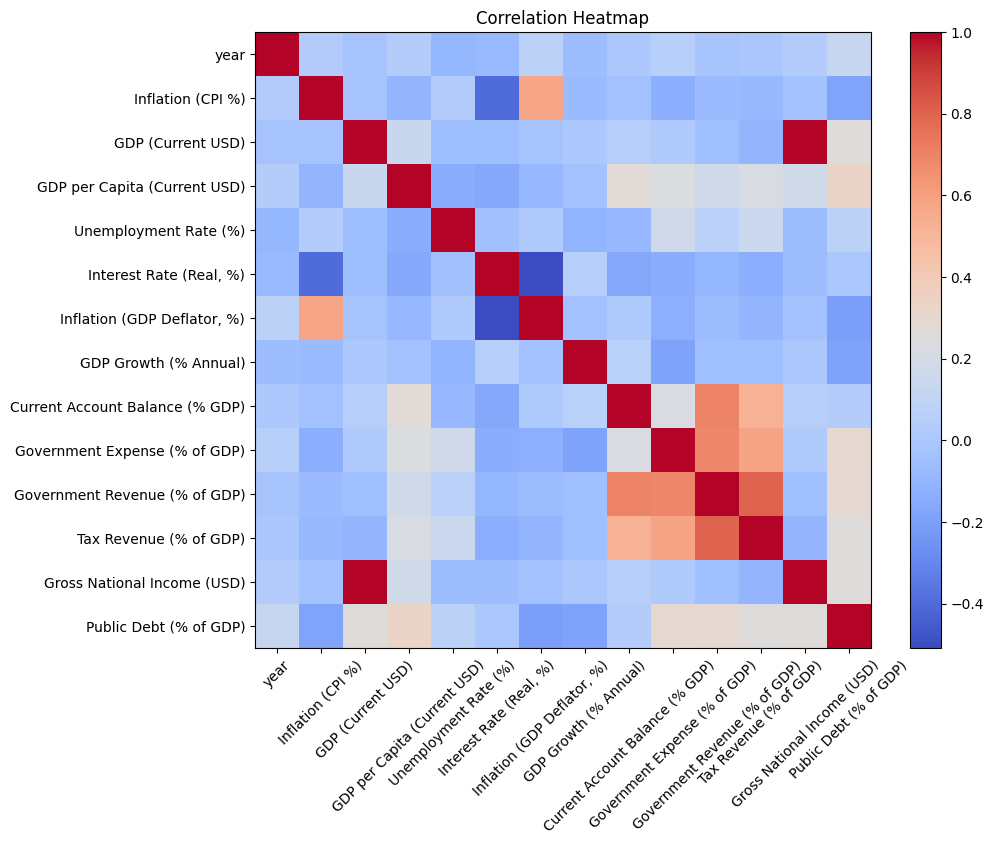

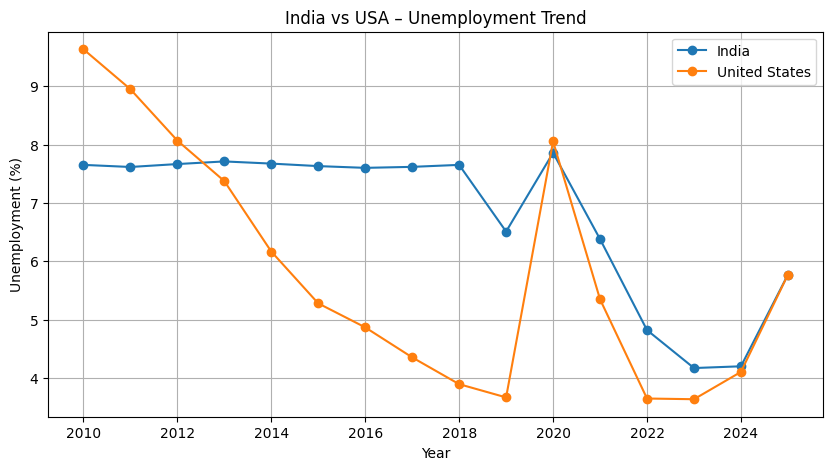


📌 EDA Completed Successfully!


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# 1. Load Dataset
# -------------------------
df = pd.read_csv("/content/world_bank_data_2025.csv")
df.columns = df.columns.str.strip()  # Clean column names

# -------------------------
# 2. Clean Numeric Columns
# -------------------------
numeric_cols = ['GDP (Current USD)', 'Inflation (CPI %)', 'Unemployment Rate (%)']
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(',', '')  # Remove commas
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric
        df[col].fillna(df[col].median(), inplace=True)

# -------------------------
# 3. Handle Missing Categorical Columns
# -------------------------
cat_cols = df.select_dtypes(include=['object','category']).columns
for col in cat_cols:
    df[col] = df[col].fillna("Unknown")

# -------------------------
# 4. Drop Duplicates
# -------------------------
df = df.drop_duplicates()

# -------------------------
# 5. Data Types
# -------------------------
if 'year' in df.columns:
    df['year'] = pd.to_numeric(df['year'], errors='coerce').fillna(0).astype(int)
if 'country_name' in df.columns:
    df['country_name'] = df['country_name'].astype('category')

# -------------------------
# 6. HISTOGRAMS
# -------------------------
for col, color in zip(['GDP (Current USD)', 'Inflation (CPI %)'], ['skyblue', 'salmon']):
    if col in df.columns:
        plt.figure(figsize=(8,5))
        plt.hist(df[col], bins=30, color=color, edgecolor='black')
        plt.title(f"{col} Distribution")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

# -------------------------
# 7. BOX PLOTS
# -------------------------
existing_cols = [col for col in numeric_cols if col in df.columns]
if existing_cols:
    plt.figure(figsize=(10,5))
    df.boxplot(column=existing_cols)
    plt.title("Boxplots of Key Indicators")
    plt.show()

# -------------------------
# 8. LINE PLOTS
# -------------------------
if 'year' in df.columns and 'GDP (Current USD)' in df.columns:
    global_gdp = df.groupby('year')['GDP (Current USD)'].mean()
    plt.figure(figsize=(10,5))
    plt.plot(global_gdp.index, global_gdp.values, marker='o', linestyle='--', color='green')
    plt.title("Global GDP Trend")
    plt.xlabel("Year")
    plt.ylabel("Average GDP")
    plt.grid(True)
    plt.show()

# Country trends
countries_list = ['India', 'United States', 'China', 'Germany']
countries = df[df['country_name'].isin(countries_list)]
plt.figure(figsize=(12,6))
for c in countries['country_name'].unique():
    subset = countries[countries['country_name']==c]
    plt.plot(subset['year'], subset['GDP (Current USD)'], marker='o', label=c)
plt.title("GDP Trend Comparison")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------
# 9. SCATTER PLOTS
# -------------------------
if all(col in df.columns for col in ['GDP (Current USD)', 'Inflation (CPI %)']):
    plt.figure(figsize=(8,5))
    plt.scatter(df['GDP (Current USD)'], df['Inflation (CPI %)'], color='purple', alpha=0.6)
    plt.title("GDP vs Inflation")
    plt.xlabel("GDP")
    plt.ylabel("Inflation (%)")
    plt.grid(True)
    plt.show()

if all(col in df.columns for col in ['GDP (Current USD)', 'Unemployment Rate (%)']):
    plt.figure(figsize=(8,5))
    plt.scatter(df['GDP (Current USD)'], df['Unemployment Rate (%)'], color='orange', alpha=0.6)
    plt.title("GDP vs Unemployment")
    plt.xlabel("GDP")
    plt.ylabel("Unemployment (%)")
    plt.grid(True)
    plt.show()

# -------------------------
# 10. BAR CHART
# -------------------------
if all(col in df.columns for col in ['year','GDP (Current USD)','country_name']):
    top10 = df[df['year']==2025].sort_values('GDP (Current USD)', ascending=False).head(10)
    if not top10.empty:
        plt.figure(figsize=(10,6))
        plt.bar(top10['country_name'], top10['GDP (Current USD)'], color='teal')
        plt.title("Top 10 Economies (2025)")
        plt.xlabel("Country")
        plt.ylabel("GDP")
        plt.xticks(rotation=45)
        plt.show()

# -------------------------
# 11. PIE CHART
# -------------------------
if 'Region' in df.columns and 'GDP (Current USD)' in df.columns:
    region_gdp = df[df['year']==2025].groupby('Region')['GDP (Current USD)'].sum()
    if not region_gdp.empty:
        plt.figure(figsize=(8,8))
        plt.pie(region_gdp.values, labels=region_gdp.index, autopct='%1.1f%%', startangle=140)
        plt.title("Region-wise GDP Share (2025)")
        plt.show()

# -------------------------
# 12. CORRELATION HEATMAP
# -------------------------
corr_cols = df.select_dtypes(include=['float64','int64']).columns
if len(corr_cols) > 1:
    corr = df[corr_cols].corr()
    plt.figure(figsize=(10,8))
    plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title("Correlation Heatmap")
    plt.show()

# -------------------------
# 13. India vs USA – Unemployment Trend
# -------------------------
if all(col in df.columns for col in ['country_name','year','Unemployment Rate (%)']):
    countries = df[df['country_name'].isin(['India','United States'])]
    plt.figure(figsize=(10,5))
    for c in countries['country_name'].unique():
        subset = countries[countries['country_name']==c]
        plt.plot(subset['year'], subset['Unemployment Rate (%)'], marker='o', label=c)
    plt.title("India vs USA – Unemployment Trend")
    plt.xlabel("Year")
    plt.ylabel("Unemployment (%)")
    plt.legend()
    plt.grid(True)
    plt.show()

print("\n📌 EDA Completed Successfully!")
